<a href="https://colab.research.google.com/github/euamura/analise_educacao_pnad/blob/main/Pretalab_Projeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO 3: BIBLIOTECAS PYTHON PARA ANÁLISE DE DADOS

## Objetivos

 1. *Introduzir as principais bibliotecas de Python para análise de dados:*
 Explorar bibliotecas amplamente utilizadas, como Pandas, NumPy e Matplotlib, e suas aplicações no tratamento de dados.

2. *Demonstrar o uso prático das bibliotecas para análise de dados:* Aplicar essas ferramentas em processos de manipulação, visualização e análise de dados reais.

3. *Praticar com dados da PNAD Contínua de 2024 (2º semestre):* Usar os dados da Pesquisa Nacional por Amostra de Domicílios (PNAD) Contínua, que investiga aspectos socioeconômicos da população brasileira, como educação, trabalho, e habitação, para simular análises de políticas públicas e entender o impacto de diferentes variáveis.

4. *Aplicar métodos avançados de análise com bibliotecas Python:* Implementar técnicas mais sofisticadas de análise para extrair insights profundos dos dados e explorar agrupamentos,função lambda, tendências e médias.

## Cenário

PNAD CONTINUA DE 2024 - 2 TRIMESTRE (ABR-MAIO-JUN)

Dados Brasil:  Com todos os estados

Dados Educação: A base de dados tem apenas dados demográficos e perguntas sobre educação.

Filtros iniciais:

1. Idade entre 18 e 90 anos

 - **OBJETIVO**

Entender como está o comportamento dos millenials brasileiros, também conhecida como geração Y, quando o cenário é educação.

### O que você precisa fazer no Projeto 3

  - **Etapa 1**

1. Carregar os arquivos 'PNAD24_EDUCACAO.csv', 'dicionario_colunas' com pandas

 - **ETAPA 2 Tratamento e Limpeza de Dados**

 1. Filtrar os dados para idade entre 18 e 35 anos - faixa etaria da geração Y
 2. tratar os valores das colunas conforme o dicionario de dados:

    sexo,
    idade,
    raça,
    sabe_ler_escrever

 3. transformar a coluna idade em faixa etaria conforme o intervalo: 18-23, 24-29 e 30-35.

 - **ETAPA 3: ANÁLISE**

 1.  Qual volume de pessoas que sabem ler e escrever?
   - Faça uma contagem na coluna e mostre o resultado como um gráfico de barras do matplotlib

  

2.  Como é a distribuição Brasil da geração Y pesquisada?

  - Agrupe a coluna sexo,raca, faixa_etaria,sigla_uf e sabe_ler_escrever fazendo a contagem desse agrupamento, salve em um dataframe o resultado.


3. Filtre o dataframe do ponto 2 para apenas os que lê e escreve, salve o resultado em novo dataframe.

4. Como é o comportamento de homens brancos e mulheres negras no  Brasil da geração Y pesquisada na faixa etária 18-23 que lê e escreve?

 - Faça um gráfico de barras horizontais para cada gênero filtrado pela raça de cada gênero, em que o eixo y é a sigla dos estados e o eixo x  o volume

 #dica: para filtrar o dataframe e fazer gráfico vc pode usar o método:

 df[((df_novo['coluna1'] == valor_filtro) & (df['coluna2'] == valor_filtro) & (df['coluna'] == valor_filtro))].plot(kind='barh', x='coluna1', y='contagem')


 5. Escreva uma conclusão do insights que encontrou no ponto 4 (OPCIONAL)

# Projeto 3

## Preparando ambiente

In [ ]:
# montando google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importando arquivos
df_pnad = pd.read_csv('/content/drive/MyDrive/Pretalab_Bootcamp/Projeto_3/PNAD24_EDUCACAO.csv')
dicionario_colunas = pd.read_excel('/content/drive/MyDrive/Pretalab_Bootcamp/Projeto_3/dicionario_colunas.xlsx')
dicionario_dados = pd.read_excel('/content/drive/MyDrive/Pretalab_Bootcamp/Projeto_3/dicionario_dados.xlsx')
print("Arquivos importados com sucesso!")

Arquivos importados com sucesso!


## Carregar arquivos (etapa 1)

In [ ]:
# arquivo pnad
df_pnad.head(10)

,ano,trimestre,sigla_uf,sigla_uf_nome,id_pessoa,V2007,V2009,V2010,V3001,V3002,...,V3009,V3009A,V3010,V3011,V3011A,V3012,V3013,V3013A,V3013B,V3014
0,2024,2,AP,Amapá,160000321011101,Mulher,27,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,4,1,2,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0
3,2024,2,AP,Amapá,160000321031104,Mulher,27,1,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
4,2024,2,AP,Amapá,160000321031102,Mulher,78,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024,2,AP,Amapá,160000321031103,Homem,23,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
6,2024,2,AP,Amapá,160000321031101,Homem,67,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024,2,AP,Amapá,160000321041102,Homem,31,1,1,2,...,NaN,7.0,1.0,NaN,NaN,1.0,5.0,NaN,NaN,2.0
8,2024,2,AP,Amapá,160000321041101,Mulher,29,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0
9,2024,2,AP,Amapá,160000321051101,Mulher,30,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0


In [ ]:
# arquivo dicionario dados
dicionario_dados.head(10)

,Código\n da\n variável,Pergunta,Categorias,Unnamed: 3
0,NaN,NaN,Tipo,Descrição
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,V2007,Sexo,1,Homem
4,NaN,NaN,2,Mulher
5,NaN,Ano de nascimento,Ano de referência menos 130 até ano de referência,Ano
6,V2009,Idade do morador na data de referência,0 a 130,Idade (em anos)
7,V2010,Cor ou raça,1,Branca
8,NaN,NaN,2,Preta
9,NaN,NaN,3,Amarela


In [ ]:
# arquivo dicionario colunas
dicionario_colunas.head(10)

,nome_coluna_codigo,coluna_pergunta,coluna__perguntas_abrev
0,ano,Ano,ano
1,trimestre,Trimestre,trimestre
2,sigla_uf,Sigla da Unidade da Federação,sigla_uf
3,id_pessoa,ID Pessoa Entrevistada,id_pessoa
4,V2007,Sexo,sexo
5,V2009,Idade do morador na data de referência,idade
6,V2010,Cor ou raça,raca
7,V3001,... sabe ler e escrever?,sabe_ler_escrever
8,V3002,... frequenta escola?,frequenta_escola
9,V3002A,A escola que ... frequenta é de,tipo_escola_frequenta


## Tratamento dos dados (etapa 2)

### Tratamendo de colunas e dados

#### Tratamendo de colunas citadas nas etapas do projeto

In [ ]:
df_pnad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363975 entries, 0 to 363974
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ano            363975 non-null  int64  
 1   trimestre      363975 non-null  int64  
 2   sigla_uf       363975 non-null  object 
 3   sigla_uf_nome  363975 non-null  object 
 4   id_pessoa      363975 non-null  int64  
 5   V2007          363975 non-null  object 
 6   V2009          363975 non-null  int64  
 7   V2010          363975 non-null  int64  
 8   V3001          363975 non-null  int64  
 9   V3002          363975 non-null  int64  
 10  V3002A         28613 non-null   float64
 11  V3003          0 non-null       float64
 12  V3003A         28613 non-null   float64
 13  V3004          0 non-null       float64
 14  V3005          0 non-null       float64
 15  V3005A         18116 non-null   float64
 16  V3006          24887 non-null   float64
 17  V3006A         267 non-null  

In [ ]:
# renomeando colunas
colunas_renomeadas = {'sigla_uf_nome': 'estado', 'V2007': 'sexo', 'V2009':'idade', 'V2010': 'raca', 'V3001': 'sabe_ler_escrever', 'V3002': 'frequenta_escola',
                      'V3002A': 'tipo_escola_frequenta', 'V3003': 'curso_frequenta', 'V3003A': 'curso_frequenta_A', 'V3004': 'duracao_curso_frequenta',
                      'V3005': 'curso_seriado', 'V3005A': 'organizacao_curso', 'V3006': 'serie_semestre_frequenta', 'V3006A': 'etapa_ensino_frequenta',
                      'V3007': 'concluiu_outra_graduacao', 'V3008': 'frequentou_escola_anteriormente', 'V3009': 'cursou_mais_elevado_anteriormente',
                      'V3009A': 'cursou_mais_elevado_anteriormenteA', 'V3010': 'duracao_curso_anteriormente', 'V3011': 'curso_seriado_anteriormente',
                      'V3011A': 'organizacao_curso_anteriormente', 'V3012': 'concluiu_primeira_serie_anterior', 'V3013': 'ultima_serie_concluida_anterior',
                      'V3013A':'etapa_ensino_frequentado_anterior', 'V3013B': 'concluiu_anos_iniciais_anterior', 'V3014': 'concluiu_curso_anteriormente'}

df_pnad = df_pnad.rename(columns = colunas_renomeadas)
df_pnad.head(3)

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,4,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,4,1,2,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


In [ ]:
# tratando coluna raça
cor_raca = {1: 'Branca', 2: 'Preta', 3:'Amarela', 4: 'Parda', 5:'Indigena', 9:'Ignorado'}
df_pnad['raca'] = df_pnad['raca'].map(cor_raca)
df_pnad.head(3)

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,1,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,1,2,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


In [ ]:
# tratando coluna sabe_ler_escrever
dic_sabe_ler_escrever = {1: 'Sim', 2: 'Não'}
df_pnad['sabe_ler_escrever'] = df_pnad['sabe_ler_escrever'].map(dic_sabe_ler_escrever).fillna('Nao aplicavel')
df_pnad.head(3)

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,2,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,2,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


#### Tratamento de colunas extras

In [ ]:
# tratando coluna frequenta_escola
dic_frequenta_escola = {1: 'Sim', 2: 'Não'}
df_pnad['frequenta_escola'] = df_pnad['frequenta_escola'].map(dic_frequenta_escola).fillna('Nao aplicavel')
df_pnad.head(3)

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


In [ ]:
# tratando coluna tipo_escola_frequenta
dic_tipo_escola_frequenta = {1: 'Rede privada', 2: 'Rede publica'}
df_pnad['tipo_escola_frequenta'] = df_pnad['tipo_escola_frequenta'].map(dic_tipo_escola_frequenta).fillna('Nao aplicavel')
df_pnad.head(3)

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


In [ ]:
# tratando coluna curso_frequenta
dic_curso_frequenta = {1: 'Pré-escolar (maternal e jardim de infância)', 2: 'Alfabetização de jovens e adultos', 3: 'Regular do ensino fundamental',
                       4: 'Educação de jovens e adultos (EJA) ou supletivo do ensino fundamental', 5: 'Regular do ensino médio',
                       6: 'Educação de jovens e adultos (EJA) ou supletivo do ensino médio', 7:'Superior - graduação', 8: 'Mestrado', 9: 'Doutorado'}

df_pnad['curso_frequenta'] = df_pnad['curso_frequenta'].map(dic_curso_frequenta).fillna('Nao aplicavel')
df_pnad.head(3)


,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


In [ ]:
# tratando coluna curso_frequenta_A
dic_curso_frequenta_a = {1: 'Creche (disponível apenas no questionário anual de educação)', 2: 'Pré-escola', 3: 'Alfabetização de jovens e adultos',
                         4: 'Regular do ensino fundamental', 5: 'Educação de jovens e adultos (EJA) do ensino fundamental', 6: 'Regular do ensino médio',
                         7: 'Educação de jovens e adultos (EJA) do ensino médio', 8: 'Superior - graduação', 9: 'Especialização de nível superior',
                         10: 'Mestrado', 11: 'Doutorado'}

df_pnad['curso_frequenta_A'] = df_pnad['curso_frequenta_A'].map(dic_curso_frequenta_a).fillna('Nao aplicavel')
df_pnad.head(3)


,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


In [ ]:
# tratando coluna duracao_curso_frequenta
dic_duracao_curso_frequenta = {1: 8, 2: 9}

df_pnad['duracao_curso_frequenta'] = df_pnad['duracao_curso_frequenta'].map(dic_duracao_curso_frequenta).fillna('Nao aplicavel')
df_pnad.head(3)

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


In [ ]:
# tratando coluna curso_seriado
dic_curso_seriado = {1: 'Sim', 2: 'Não'}

df_pnad['curso_seriado'] = df_pnad['curso_seriado'].map(dic_curso_seriado).fillna('Nao aplicavel')
df_pnad.head(3)

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


In [ ]:
# tratando coluna organizacao_curso
dic_organizacao_curso = {1: 'Períodos semestrais', 2: 'Anos', 3: 'Outra forma'}

df_pnad['organizacao_curso'] = df_pnad['organizacao_curso'].map(dic_organizacao_curso).fillna('Nao aplicavel')
df_pnad.head(3)

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


In [ ]:
# tratando coluna serie_semestre_frequenta
dic_serie_semestre_frequenta = { 1: 'Primeira (o)', 2: 'Segunda (o)', 3: 'Terceira (o)', 4: 'Quarta (o)', 5: 'Quinta (o)', 6: 'Sexta (o)', 7: 'Sétima (o)',
                                 8: 'Oitava (o)', 9: 'Nona (o)', 10: 'Décimo', 11: 'Décimo primeiro', 12: 'Décimo segundo', 13: 'Curso não classificado em séries ou anos'}

df_pnad['serie_semestre_frequenta'] = df_pnad['serie_semestre_frequenta'].map(dic_serie_semestre_frequenta).fillna('Nao aplicavel')
df_pnad.head(3)

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


In [ ]:
# tratando coluna etapa_ensino_frequenta (ens fundamental)
dic_etapa_ensino_frequenta = {1: 'Anos iniciais (primeiro segmento)', 2: 'Anos finais (segundo segmento)'}

df_pnad['etapa_ensino_frequenta'] = df_pnad['etapa_ensino_frequenta'].map(dic_etapa_ensino_frequenta).fillna('Nao aplicavel')
df_pnad.head(3)

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


In [ ]:
# tratando coluna concluiu_outra_graduacao
dic_concluiu_outra_graduacao = {1: 'Sim', 2: 'Não'}

df_pnad['concluiu_outra_graduacao'] = df_pnad['concluiu_outra_graduacao'].map(dic_concluiu_outra_graduacao).fillna('Nao aplicavel')
df_pnad.head(3)

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0


### Filtro de idades

In [ ]:
# filtrando idades

filtro_idade = (df_pnad['idade'] >= 18) & (df_pnad['idade'] <= 35)
df_pnad = df_pnad[filtro_idade]
df_pnad.head()

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormente,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,NaN,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0
3,2024,2,AP,Amapá,160000321031104,Mulher,27,Branca,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0
5,2024,2,AP,Amapá,160000321031103,Homem,23,Parda,Sim,Não,...,NaN,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0


In [ ]:
# conferencia de linhas e colunas do dataframe filtrado por idade
shape = df_pnad.shape
print(f'O dataframe filtrado possui {shape[0]} linhas e {shape[1]} colunas')

O dataframe filtrado possui 117580 linhas e 30 colunas


In [ ]:
# criando coluna faixa etaria com pandas.cut

# criando faixas etarias
bins = [18, 24, 30, 36] # valores em intervalos
labels = ['18-23', '24-29', '30-35'] # rotulos

# criando coluna
df_pnad['faixa_etaria'] = pd.cut(df_pnad['idade'], bins=bins, labels=labels, right = False)

In [ ]:
df_pnad.head()

,ano,trimestre,sigla_uf,estado,id_pessoa,sexo,idade,raca,sabe_ler_escrever,frequenta_escola,...,cursou_mais_elevado_anteriormenteA,duracao_curso_anteriormente,curso_seriado_anteriormente,organizacao_curso_anteriormente,concluiu_primeira_serie_anterior,ultima_serie_concluida_anterior,etapa_ensino_frequentado_anterior,concluiu_anos_iniciais_anterior,concluiu_curso_anteriormente,faixa_etaria
0,2024,2,AP,Amapá,160000321011101,Mulher,27,Parda,Sim,Não,...,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,24-29
1,2024,2,AP,Amapá,160000321021101,Mulher,33,Parda,Sim,Não,...,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,30-35
2,2024,2,AP,Amapá,160000321021102,Homem,27,Parda,Sim,Não,...,7.0,1.0,NaN,NaN,1.0,7.0,NaN,NaN,2.0,24-29
3,2024,2,AP,Amapá,160000321031104,Mulher,27,Branca,Sim,Não,...,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,24-29
5,2024,2,AP,Amapá,160000321031103,Homem,23,Parda,Sim,Não,...,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,18-23


## Análise (etapa 3)

### Qual volume de pessoas que sabem ler e escrever?

#### Volume de pessoas que sabem ler e escrever geração y

In [ ]:
# contagem da população
contagem_sabe_ler_escrever_y = df_pnad['sabe_ler_escrever'].value_counts()
print(contagem_sabe_ler_escrever_y)

sabe_ler_escrever
Sim    116065
Não      1515
Name: count, dtype: int64


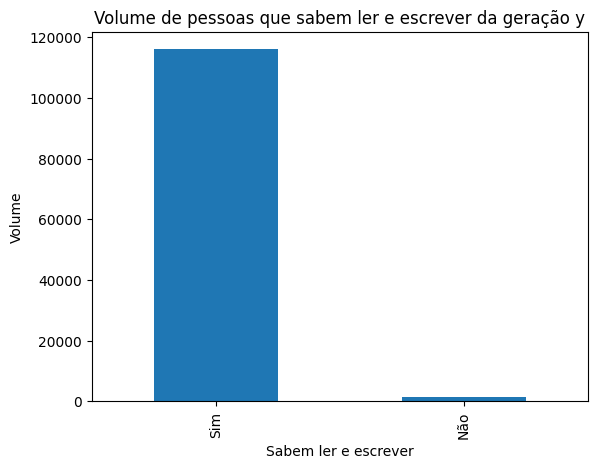

In [ ]:
# visualização
contagem_sabe_ler_escrever_y.plot(kind='bar')
plt.title('Volume de pessoas que sabem ler e escrever da geração y')
plt.xlabel('Sabem ler e escrever')
plt.ylabel('Volume')
plt.show()

### Como é a distribuição Brasil da geração Y pesquisada?

In [ ]:
# agrupando colunas e contando distribuição
df_distribuicao = df_pnad.groupby(['faixa_etaria', 'sigla_uf', 'sexo',  'raca', 'sabe_ler_escrever']).size()
df_distribuicao = df_distribuicao.reset_index(name='contagem')
df_distribuicao.head(100)

<ipython-input-111-fb3fc89c00e1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_distribuicao = df_pnad.groupby(['faixa_etaria', 'sigla_uf', 'sexo',  'raca', 'sabe_ler_escrever']).size()


,faixa_etaria,sigla_uf,sexo,raca,sabe_ler_escrever,contagem
0,18-23,AC,Homem,Amarela,Não,0
1,18-23,AC,Homem,Amarela,Sim,0
2,18-23,AC,Homem,Branca,Não,0
3,18-23,AC,Homem,Branca,Sim,91
4,18-23,AC,Homem,Ignorado,Não,0
...,...,...,...,...,...,...
95,18-23,AP,Mulher,Preta,Sim,24
96,18-23,BA,Homem,Amarela,Não,1
97,18-23,BA,Homem,Amarela,Sim,1
98,18-23,BA,Homem,Branca,Não,1


In [ ]:
# salvando arquivo df_distribuicao no meu drive em excel
df_distribuicao.to_excel('/content/drive/MyDrive/Pretalab_Bootcamp/Projeto_3/df_distribuicao.xlsx')
print('Arquivo salvo com sucesso!')

Arquivo salvo com sucesso!


### Filtro: Criando DF apenas com quem lê e escreve

In [ ]:
# filtrando apenas os que sabem ler e escrever
df_alfabetizados = df_distribuicao[df_distribuicao['sabe_ler_escrever'] == 'Sim']
df_alfabetizados.head(10)

,faixa_etaria,sigla_uf,sexo,raca,sabe_ler_escrever,contagem
1,18-23,AC,Homem,Amarela,Sim,0
3,18-23,AC,Homem,Branca,Sim,91
5,18-23,AC,Homem,Ignorado,Sim,0
7,18-23,AC,Homem,Indigena,Sim,6
9,18-23,AC,Homem,Parda,Sim,386
11,18-23,AC,Homem,Preta,Sim,45
13,18-23,AC,Mulher,Amarela,Sim,3
15,18-23,AC,Mulher,Branca,Sim,100
17,18-23,AC,Mulher,Ignorado,Sim,0
19,18-23,AC,Mulher,Indigena,Sim,6


In [ ]:
# salvar df_alfabetizados como arquivo excel no meu drive
df_alfabetizados.to_excel('/content/drive/MyDrive/Pretalab_Bootcamp/Projeto_3/df_alfabetizados.xlsx')
print('Arquivo salvo com sucesso!')

Arquivo salvo com sucesso!


### Como é o comportamento de homens brancos e mulheres negras no Brasil da geração Y pesquisada na faixa etária 18-23 que lê e escreve?

Text(0, 0.5, 'Contagem')

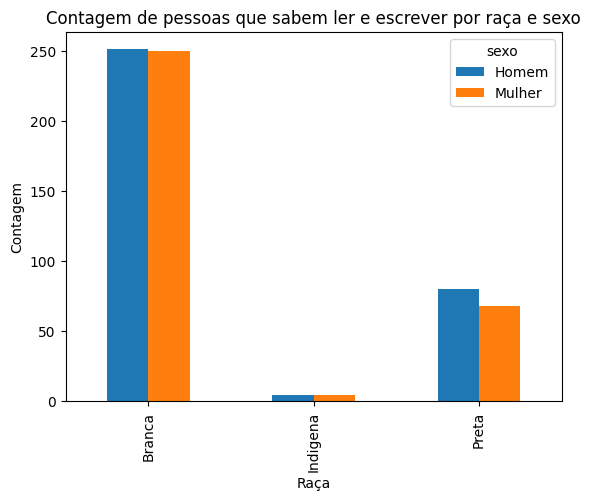

In [ ]:
# comparando dados
comparativo_raca_sexo = df_alfabetizados[(df_alfabetizados['raca'].isin(['Preta', 'Branca', 'Indigena'])) & (df_alfabetizados['sexo'].isin(['Homem','Mulher'])) & (df_alfabetizados['faixa_etaria'] == '18-23')]

# pivotando grafico
grafico_comparativo_raca_sexo = comparativo_raca_sexo.pivot_table(index='raca', columns = 'sexo', values = 'contagem')

# plotando grafico
grafico_comparativo_raca_sexo.plot(kind='bar')


# personalização
plt.title("Contagem de pessoas que sabem ler e escrever por raça e sexo")
plt.xlabel("Raça")
plt.ylabel("Contagem")

#### Insights (etapa 4)

**Desigualdade racial na educação de jovens da geração y**

A desigualdade sobre acesso a educação: ler e escrever é maior entre raças do que entre gêneros, na faixa etária de 18-23 anos. É possivel notar que no caso da população preta, esse recorte de genêro é mais presente, pois há uma diferença notável entres homens pretos que sabem ler e escrever e mulheres pretas.

A diferença entre as raças é discrepante, mulheres e homens brancos tem uma diferença de mais de 100 mil com relação as pessoas pretas.

Indígenas tem um numero estabilizado entre homens e mulheres mas tem valores significativamente menores comparadas as outras raças. O que nos coloca indicadores históricos e geográficos de como está sendo abordada a educação indígena ou até mesmo a coleta de dados da população indígena.




*   A maioria dos jovens que sabem ler e escrever são brancos.
*   Discrepância de raças é maior que de gênero.
*   Jovens indígenas tem o número mais baixo de homens e mulheres que sabem ler e escrever.
*   A população preta jovem tem uma proporção de genêro diferente das outras raças.


Próximos passos:

- Recorte de genêro: Fatores que afetam o acesso a educação de mulheres pretas: Mulheres pretas começam a trabalhar mais cedo? Mulheres pretas tornam-se chefes de família mais cedo?

- Privilégio histórico e socioêconomico: O fato de os jovens que sabem ler e escrever são na maioria brancos está atrelado a suas condição financeiras e de suas famílias?

- Condições geográficas: A população indígena está distribuida em cidades interioranas? Há falta de acesso a educação em municípios menores  e isso afeta a educação de jovens indígenas? Jovens indígenas precisam mudar de seus municípios natais para ter acesso a educação?

- Fatores regionais: Os números são muito discrepantes no cenário nacional, como eles se comportam em cenários regionais?














